# Analysis - RDF and MSD

In [14]:
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
from MDAnalysis.analysis import msd
import matplotlib.pyplot as plt
import numpy as np
import os

## RDF

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


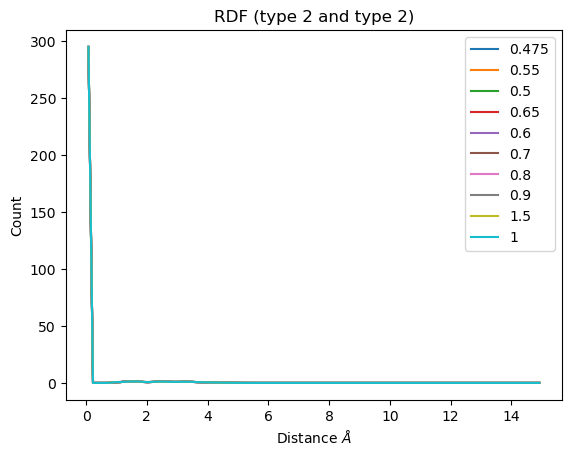

In [3]:
# Collect files
temps = ["0.475", "0.55", "0.5", "0.65", "0.6", "0.7", "0.8", "0.9", "1.5", "1"]
steps = ["30000000", "3000000", "10000000", "350000", "1000000", "180000", "150000", "150000", "10000", "50000"]

# Plot data
fig1, ax1 = plt.subplots()
for temp, step in zip(temps, steps):

    # Import and plot
    traj = mda.Universe(f"Data/equil/kalj_T{temp}_n360_v300_{step}_1.lammpstrj", f"Data/prod/kalj_T{temp}_n360_v300_prod_{step}_1.unwrap.dcd", topology_format="LAMMPSDUMP")
    t_1 = traj.select_atoms('type 1')
    t_2 = traj.select_atoms('type 2')

    # 1 - 1
    g_11 = InterRDF(t_2, t_2, nbins=100)
    g_11.run()
    ax1.plot(g_11.bins, g_11.rdf, label=temp)

# Show plot
ax1.set_title('RDF (type 2 and type 2)')
ax1.set_xlabel('Distance $\AA$')
ax1.set_ylabel('Count')
ax1.legend()
plt.show()

## MSD

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


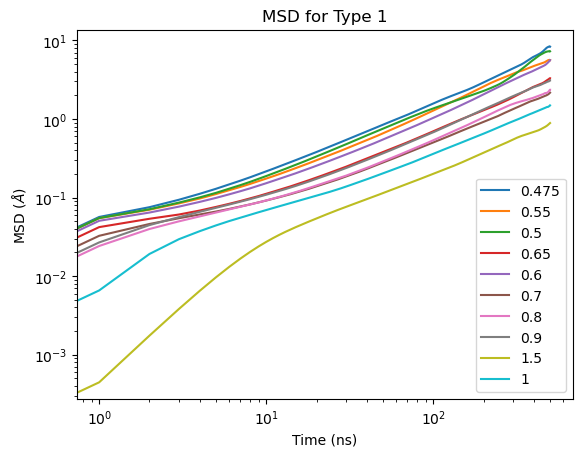

In [6]:
# Plot data
fig2, ax2 = plt.subplots()
for temp, step in zip(temps, steps):

    # Get Data
    traj = mda.Universe(f"Data/equil/kalj_T{temp}_n360_v300_{step}_1.lammpstrj", f"Data/prod/kalj_T{temp}_n360_v300_prod_{step}_1.unwrap.dcd", topology_format="LAMMPSDUMP")
    MSD = msd.EinsteinMSD(traj, select='type 1')
    MSD.run()
    data = MSD.results.timeseries
    nframes = MSD.n_frames
    timestep = 1 
    lagtimes = np.arange(nframes)*timestep 

    # Add to plot
    ax2.loglog(lagtimes, data, label=temp)

# Show
ax2.set_title('MSD for Type 1')
ax2.set_xlabel('Time (ns)')
ax2.set_ylabel('MSD ($\AA$)')
plt.legend()
plt.show()

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


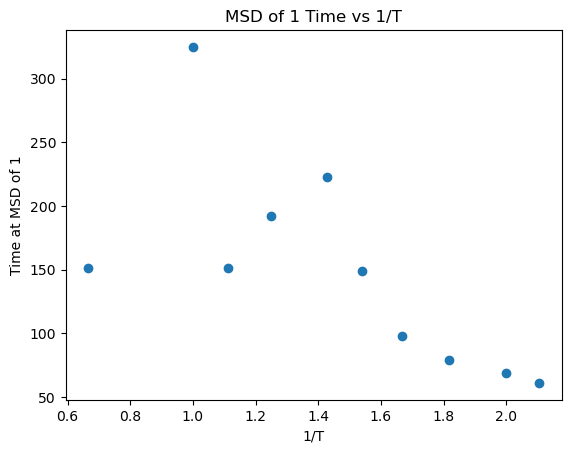

In [28]:
# Plot data
x, y = [], []
for temp, step in zip(temps, steps):

    # Get Data
    traj = mda.Universe(f"Data/equil/kalj_T{temp}_n360_v300_{step}_1.lammpstrj", f"Data/prod/kalj_T{temp}_n360_v300_prod_{step}_1.unwrap.dcd", topology_format="LAMMPSDUMP")
    MSD = msd.EinsteinMSD(traj, select='type 1')
    MSD.run()
    data = MSD.results.timeseries
    nframes = MSD.n_frames
    timestep = 1 
    lagtimes = np.arange(nframes)*timestep 

    # X and Y
    x_data = float(temp)
    for time, val in zip(lagtimes, data):
        if val >= 1:
            y_data = time
            break

    x.append(1/x_data)
    y.append(y_data)

# Plot and show
plt.scatter(x,y)
plt.title('MSD of 1 Time vs 1/T')
plt.xlabel('1/T')
plt.ylabel('Time at MSD of 1')
plt.show()

In [29]:
for val1, val2 in zip(x,y):
    print(f"{val1}\t{val2}")

2.1052631578947367	61
1.8181818181818181	79
2.0	69
1.5384615384615383	149
1.6666666666666667	98
1.4285714285714286	223
1.25	192
1.1111111111111112	151
0.6666666666666666	151
1.0	325
